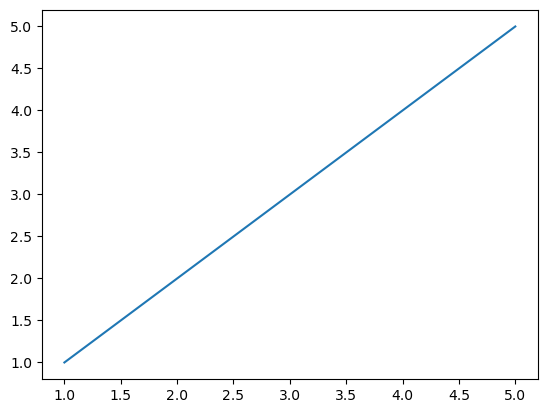

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(1,5)
y=np.linspace(1,5)

plt.plot(x,y)
plt.show()
